# Derin öğrenme Tabanlı Modern Dil Modelleri
- Word Embeddings (Kelimelerin vektör temsilleri)
- Recurrent Neural Networks (RNN)
- Long Short-Term Memory (LSTM)
- Transformers Modelleri :Bert ,GPT,LLAMA


# Word  Embeddings (Kelimelerin Vektör Temsilleri )
- Word embeddings ,kelimeleri sayısal vektörlerle ifade eden bir yöntemdir.
- Bu temsiller,kelimeler arasındaki anlamsal ilişkileri öğrenmeyi sağlar
- Aynı anlamda veya benzer anlamda kullanılan kelimeler ,vektör uzayında birbirine yakın olur  

# Neden kelimeleri vektörlerle temsil etmeliyiz? 
- Dil anlamı yakalama
- Matematiksel işlemler
- Verimli temsil 


# Word2Vec Nedir ?
- Özellikleri ve avantajları 
    - Anlamsal yakınlıkları kelime komşuluklarına göre öğrenir
    - Kelimeler arasında anlamlı matematiksel işlemler yapmayı sağlar.
- Kim Geliştirdi?
    - Google Tohamas Mikolov ve ekibi
- Kullanılan veri set :Google News corpus.
- Kaynak :Haber metinleri
- Büyüklük :Yaklaşık 100 milyar kelime

In [ ]:
Word2vec Nedir ? 
- Temel Modelleri : CBOW (Continous Bag of Words ve Skip-gram )

CBOW : çevresindeki bağlam kelimelerle target bulmaya çalışır
Skipgram : target kelime ile bağlam kelimeleri bulmaya çalışır

# FastText 
- Özellikleri ve avantajları 
    - Kelimeleri karakter seviyesinde de öğrenir,nadir kelimeler için daha güçlü bir modeldir
- Kim geliştirdi ? 
    - Facebook AL
- Kullanılan veri seti
    - Wikipedia ,comma crawl gibi büyük veri setleri 

| Özellik      | Word2Vec                                       | FastText                                                |
|---------     |------------------------------------------------|---------------------------------------------------------|
| Temel Yöntem | Kelimeler arasındaki  komşulukları kullanır    | Kelimeleri karakter temsil eder                         | 
| Kapsam       | Sabit Kelime vektörleri                        | Alt kelime bilgisiyle nadir kelimeleri daha iyi öğrenir |


# Vektör uzayı ve anlam yakınlığı nedir ?
 - Kelimelerin vektör temsilleri , anlamlarına göre vektör uzayında konumlandırılır 
 - Anlamca benzer kelimeler(örneğin :"kedi" ve "köpek" ) vektör uzayında birbirne yakın olurken , farklı anlamdaki kelimeler (örneğin :"kedi" ve "araba" ) uzakta yer alır.
 - Yakınlık ve uzaklık ayrımı Kosinüs Benzerliği ile yapılabilir.
 

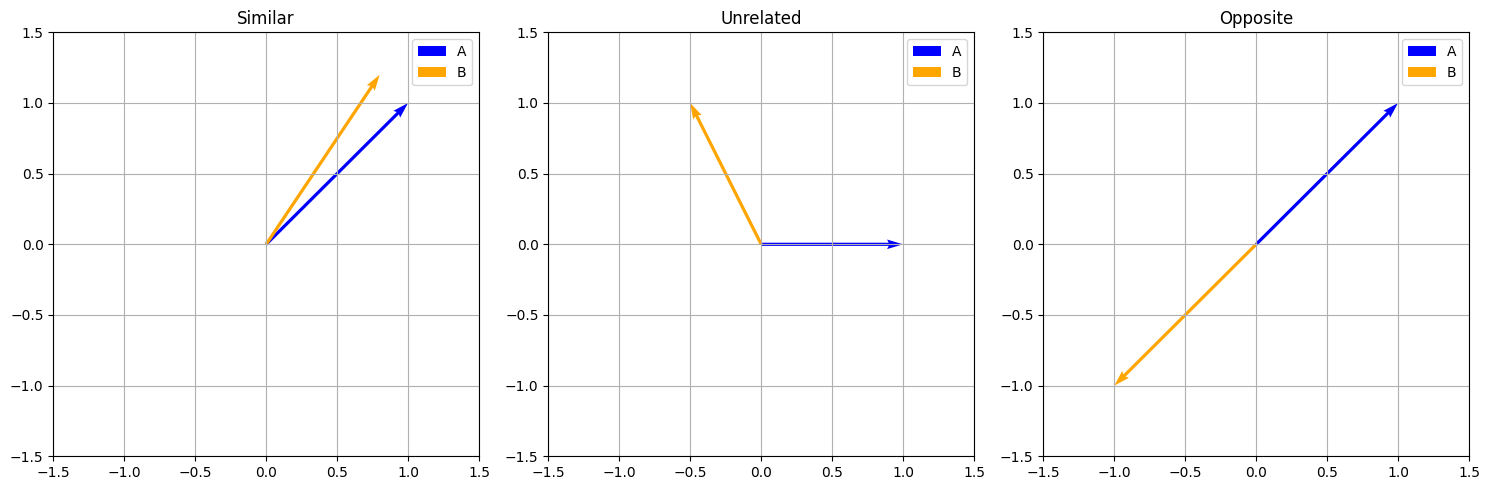

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Vektör tanımları
similar_a = np.array([1, 1])
similar_b = np.array([0.8, 1.2])  

unrelated_a = np.array([1, 0])
unrelated_b = np.array([-0.5, 1])  

opposite_a = np.array([1, 1])
opposite_b = np.array([-1, -1])

# Grafik çizim alanını oluştur
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Similar (Benzer)
axes[0].quiver(0, 0, similar_a[0], similar_a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='A')
axes[0].quiver(0, 0, similar_b[0], similar_b[1], angles='xy', scale_units='xy', scale=1, color='orange', label='B')
axes[0].set_xlim(-1.5, 1.5)
axes[0].set_ylim(-1.5, 1.5)
axes[0].grid(True)
axes[0].set_title('Similar')
axes[0].legend()

# Unrelated (İlişkisiz)
axes[1].quiver(0, 0, unrelated_a[0], unrelated_a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='A')
axes[1].quiver(0, 0, unrelated_b[0], unrelated_b[1], angles='xy', scale_units='xy', scale=1, color='orange', label='B')
axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)
axes[1].grid(True)
axes[1].set_title('Unrelated')
axes[1].legend()

# Opposite (Zıt)
axes[2].quiver(0, 0, opposite_a[0], opposite_a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='A')
axes[2].quiver(0, 0, opposite_b[0], opposite_b[1], angles='xy', scale_units='xy', scale=1, color='orange', label='B')
axes[2].set_xlim(-1.5, 1.5)
axes[2].set_ylim(-1.5, 1.5)
axes[2].grid(True)
axes[2].set_title('Opposite')
axes[2].legend()

# Genel ayarlar
plt.tight_layout()
plt.show()


# Benzerliklerin Görselleştirilmesi (t-SNE,PCA)

# Recurrent Neural Networks (RNN)

- Zaman serisi ve Sekans Verisi 
- Standart Sinir ağları zaman serilerinde neden yetersiz
- RNN nedir ?
- Mimarisi nedir nasıl çalışır
- Vanishing Gradient Problemi
- Rnn ile NLP alanında yapılan uygulamalar

### Zaman serisi ve sekans verisi nedir ?
- Speech recognition
### Sekans (sıralı) verisi
- DNA Dizileri
- Doğal dil 

## Dil ve zaman serisi verilerinde dizisel bağlılık nedir ? 
- Dizisel bağımlılık : Zaman serisi ve dil verilerinde ,her bir öğe kelime veya veri noktası sırasıyla önceki öğelere bağımlıdır
- Doğal Dil örneği: Cümlede bir kelimenin anlamı ,önceki kelimelerle ilşkili olabilir.EXP:Ben kahve içiyorum.Cümlesinde içiyorum kelimesinin anlamı önceki kelimelerden etkilenir(ben içiyor -um)
- Zaman serisi örneği : Hava sıcaklığının yarın ne olacağı ,bugünkü ve önceki günlerin sıcaklığına bağlı olabilir.


## Standart Sinir ağları sekans verilerinde neden yetersiz?
- Sabit Girdi /çıktı 
- Zaman Bağımlılığı 
- Geçmiş Bilgiyi kaybetme 

- RNN'ler ,sekans verilerini işlemek için özel olarak tasarlanmış sinir ağlarıdır.
- Her zaman adımında ,önceki zaman adımındaki bilgiyi saklayarak ve sonraki adımlarla bu bilgiyi güncelleyerek çalışırlar
- RNN'in Temel özellikleri
    - Zaman boyutunda tekrar
    - Sekans Verisi için uygun

# RNN Mimarisi
- Ağ yapısı her  zaman aralığında  gizli katman vardır.
- Zaman boyutunda tekrar yapısı 


# Vanishing Gradient Sorunu  nedir ? 
- RNN'lerde eğitim sırasında ortaya çıkar,Geriye Dönük hata yayılımı  backpropagation sırasında ,gradyanlar çok küçük hale gelir ve bu uzun süreli bağımlılıkların öğrenilmesini zorlaştırır.
- Neden oluşur ?
    - Her zaman adımında zincirleme türev alınır
- Sonuç : Kısa dönem bağımlılıkları öğrenir,ancak uzun dönem bağımlılıkları öğrenmekte zorlanır.

### Rnn ile NLP alanında yapılan uygulamalr 
- Dil modelleme -Bir sonraki kelimeyi tahmin etme
- Makine çevirisi -Translate
- Duygu analizi 
- Konuşma Tanıma 
- Metin üretimi 


In [22]:
import numpy  as np 
import pandas as pd 

from gensim.models import Word2Vec

from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense,Embedding
from keras_preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [38]:
data = {
    "text": [
        "Otelin konumu harikaydı, her yere çok yakındı.",
        "Odamız çok soğuktu ve ısıtma düzgün çalışmıyordu.",
        "Personel çok ilgili ve güler yüzlüydü.",
        "Wi-Fi bağlantısı çok zayıftı ve sürekli kesiliyordu.",
        "Kahvaltı çeşitleri çok zengindi ve lezzetliydi.",
        "Banyo temiz değildi, ayrıca havlular kokuyordu.",
        "Manzara müthişti, özellikle balkonun keyfi paha biçilemezdi.",
        "Odalar da ses yalıtımı çok kötü, yan odadaki sesler rahatsız ediciydi.",
        "Otelin tasarımı ve dekorasyonu çok şıktı, estetik bir deneyim yaşattı.",
        "Resepsiyonda çok bekledik, hizmet çok yavaştı.",
        "Havuz alanı çok geniş ve hijyenikti.",
        "Minibar neredeyse boştu ve yenilenmemişti.",
        "Fiyat/performans dengesi mükemmeldi, kesinlikle tavsiye ederim.",
        "Oda servisi çok geç geldi ve yiyecekler soğumuştu.",
        "Otopark ücretsiz ve oldukça genişti, park etmek çok kolaydı.",
        "Çarşaflar temiz değildi ve yatak rahatsızdı.",
        "Spa alanı çok rahatlatıcıydı, özellikle masaj hizmetleri çok iyiydi.",
        "Havalandırma sistemi çok eskiydi ve rahatsız edici bir koku vardı.",
        "Giriş işlemleri çok hızlı yapıldı, personel profesyoneldi.",
        "Klima düzgün çalışmıyordu ve odada çok sıcak oldu.",
        "Oda çok genişti ve ferah bir atmosferi vardı.",
        "Banyo oldukça modern ve genişti, rahatça kullanılabiliyordu.",
        "Otelin bulunduğu bölge çok sakin ve huzurluydu.",
        "Personel her zaman yardımcı oldu ve sorularımıza hızla yanıt verdi.",
        "Odada bir kaç eksik eşya vardı ama genel olarak memnundum.",
        "Balkonda oturmak çok keyifliydi, manzarayı izlemek çok güzel.",
        "Çalışanlar oldukça profesyoneldi ve her konuda yardımcı oldular.",
        "Restoran oldukça pahalıydı, fiyatlar çok yüksekti.",
        "Banyoda su akışının gücü çok düşüktü.",
        "Odada çok fazla toz vardı, temizlik yetersizdi.",
        "Otelin konumu çok merkeziydi, her yere kolayca ulaşabiliyorduk.",
        "Çalışanlar biraz daha güler yüzlü olabilirdi.",
        "Otele gidiş yolunda biraz zorluk yaşadık, tabela eksikti.",
        "Oda oldukça temizdi ve düzenli bir şekilde hazırlanmıştı.",
        "Wi-Fi çok hızlıydı ve odada çalışmakta hiç zorluk yaşamadım.",
        "Odalarda ses yalıtımı oldukça iyiydi, dışarıdaki gürültüden etkilenmedim.",
        "Banyo hijyenikti ve günlük olarak temizlendi.",
        "Otelde birden fazla restoran olması büyük bir avantajdı.",
        "Çalışanlar çok profesyonel ve hızlı bir şekilde hizmet sundular.",
        "Tatil köyü çok kalabalıktı, biraz daha sakin olabilirdi.",
        "Otelin içinde oldukça fazla aktivite vardı, sıkılmadım.",
        "Genel alanlar oldukça düzenliydi ve temizdi.",
        "Otelin dekorasyonu biraz eskiydi, yenilenmesi gerekebilir.",
        "Yatak oldukça rahattı ve çok rahat bir uyku uyudum.",
        "Kahvaltı salonu biraz kalabalıktı, oturacak yer bulmak zor oldu.",
        "Yüzme havuzunun suyu oldukça soğuktu, rahat edemedim.",
        "Otele giriş çok hızlıydı ve işlem oldukça kolaydı.",
        "Çalışanlar genellikle çok yardımcıydı ama bazen ilgisizlerdi.",
        "Otelde dışında pek fazla restoran yoktu.",
        "Odada televizyon kanalları oldukça sınırlıydı.",
        "Çarşaflar ve havlular her gün temizlendi.",
    ],
    "label": [
        "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif",
        "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif",
        "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif",
        "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif",
        "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif", "pozitif", "negatif",
        "pozitif",]
}

In [39]:
df = pd.DataFrame(data)

In [40]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df["text"])
sequences = tokenizer.texts_to_sequences(df["text"])
word_index = tokenizer.word_index
print("Vocap size : ", len(word_index))

Vocap size :  226


In [41]:
# padding process 
maxlen = max(len(seq) for seq in sequences)
X = pad_sequences(sequences,maxlen=maxlen)
print("X shape : ", X.shape)

X shape :  (51, 11)


In [42]:
#label encodeing

label_encoder=LabelEncoder()
y = label_encoder.fit_transform(df["label"])
print (" Y shape : ", y.shape)

 Y shape :  (51,)


In [43]:
X_train,X_text,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
# word embedding

sentences =[ text.split() for text in df["text"]]
print(sentences)

[['Otelin', 'konumu', 'harikaydı,', 'her', 'yere', 'çok', 'yakındı.'], ['Odamız', 'çok', 'soğuktu', 've', 'ısıtma', 'düzgün', 'çalışmıyordu.'], ['Personel', 'çok', 'ilgili', 've', 'güler', 'yüzlüydü.'], ['Wi-Fi', 'bağlantısı', 'çok', 'zayıftı', 've', 'sürekli', 'kesiliyordu.'], ['Kahvaltı', 'çeşitleri', 'çok', 'zengindi', 've', 'lezzetliydi.'], ['Banyo', 'temiz', 'değildi,', 'ayrıca', 'havlular', 'kokuyordu.'], ['Manzara', 'müthişti,', 'özellikle', 'balkonun', 'keyfi', 'paha', 'biçilemezdi.'], ['Odalar', 'da', 'ses', 'yalıtımı', 'çok', 'kötü,', 'yan', 'odadaki', 'sesler', 'rahatsız', 'ediciydi.'], ['Otelin', 'tasarımı', 've', 'dekorasyonu', 'çok', 'şıktı,', 'estetik', 'bir', 'deneyim', 'yaşattı.'], ['Resepsiyonda', 'çok', 'bekledik,', 'hizmet', 'çok', 'yavaştı.'], ['Havuz', 'alanı', 'çok', 'geniş', 've', 'hijyenikti.'], ['Minibar', 'neredeyse', 'boştu', 've', 'yenilenmemişti.'], ['Fiyat/performans', 'dengesi', 'mükemmeldi,', 'kesinlikle', 'tavsiye', 'ederim.'], ['Oda', 'servisi', 'çok'

In [45]:
word2vec_model =Word2Vec(sentences,vector_size=100,window=5,min_count=1)

In [46]:
embedding_dim =100
embedding_matrix = np.zeros((len(word_index ) + 1,embedding_dim))

In [47]:
print(embedding_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [48]:
for word , i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [49]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00065522  0.00026918  0.00508273 ... -0.00714276  0.00095633
   0.00631503]
 [-0.00873729  0.00368151  0.00516041 ... -0.00250074 -0.00942802
   0.00443171]
 ...
 [-0.00673967 -0.00426407  0.00247377 ...  0.00389715 -0.00206693
  -0.00867757]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00303316 -0.00868868 -0.0008049  ... -0.0075181   0.00289373
   0.00284276]]


In [50]:
#Build RNN model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1 ,output_dim=embedding_dim,weights=[embedding_matrix],input_length=False))
model.add(SimpleRNN(100,return_sequences =False))
model.add(Dense(1,activation ="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=10,batch_size =2 ,validation_data = (X_text,y_test))

Epoch 1/10


c:\llm\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5635 - loss: 0.7083 - val_accuracy: 0.3750 - val_loss: 0.7015
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.5731 - val_accuracy: 0.4375 - val_loss: 0.8059
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9666 - loss: 0.1613 - val_accuracy: 0.4375 - val_loss: 1.4671
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0171 - val_accuracy: 0.5625 - val_loss: 1.8124
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.5625 - val_loss: 2.0208
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.3750 - val_loss: 2.2251
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.5000 - val_loss: 2.2424
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 7.2024e-04 - val_accuracy: 0.5000 - val_loss: 2.268

In [52]:
loss ,accuracy = model.evaluate(X_text,y_test)
print("Test loss : " , loss)
print("Test accuracy : ",accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 2.3200
Test loss :  2.320042133331299
Test accuracy :  0.5


## working big dataset please check this -> 
- https://www.kaggle.com/code/zehranurmangal/learning-rnn